In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from glob import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from tqdm import tqdm
from glob import glob

import cv2
import warnings
import torch
import json


In [2]:
import random
import numpy as np
import os
import cv2
import glob
from PIL import Image
import PIL.ImageOps    

In [ ]:
#folder1 = glob('/content/drive/MyDrive/재활용 가능 페트병/*')
len(folder1)

686

In [ ]:
folder2 = glob('/content/drive/MyDrive/재활용가능 어그멘테이션/*')

In [ ]:
print(len(folder1))
print(len(folder2))
folder1.extend(folder2)
print(len(folder1))

342
344
686


In [ ]:
folder3 = glob('/content/drive/MyDrive/재활용 불가능 페트병/*')
folder2 = glob('/content/drive/MyDrive/재활용불가능 어그멘테이션/*')
print(len(folder3))
print(len(folder2))
folder3.extend(folder2)
print(len(folder3))

344
344
688


In [ ]:
for i in range(len(folder1)):
  x = Image.open(folder1[i])
  try:
    x.save('/content/drive/MyDrive/재활용가능데이터셋/'+str(i)+'.jpg')
  except:
    x= x.convert('RGB')
    x.save('/content/drive/MyDrive/재활용가능데이터셋/'+str(i)+'.jpg')

In [ ]:
for i in range(len(folder3)):
  x = Image.open(folder3[i])
  try:
    x.save('/content/drive/MyDrive/재활용불가능데이터셋/'+str(i)+'.jpg')
  except:
    x= x.convert('RGB')
    x.save('/content/drive/MyDrive/재활용불가능데이터셋/'+str(i)+'.jpg')

In [6]:
import pathlib

path = pathlib.Path('/content/drive/MyDrive/모델')

In [7]:
batch_size = 32

In [8]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  path,
  validation_split=0.2,
  subset="training",
  seed=123,
  batch_size=batch_size)

Found 1374 files belonging to 2 classes.
Using 1100 files for training.


In [9]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  batch_size=batch_size)

Found 1374 files belonging to 2 classes.
Using 274 files for validation.


In [32]:
class_names = train_ds.class_names
print(class_names)

['재활용가능데이터셋', '재활용불가능데이터셋']


In [10]:
# 정규화 작업

normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [11]:
# 정규화 작업

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

print(np.min(first_image), np.max(first_image))

0.0 1.0


In [12]:
# 모델 작성
# 
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(256, 256, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
# 훈련

epochs=50

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
35/35 [==============================] - 130s 4s/step - loss: 0.7885 - accuracy: 0.6745 - val_loss: 0.4955 - val_accuracy: 0.7263
Epoch 2/50
35/35 [==============================] - 79s 2s/step - loss: 0.3407 - accuracy: 0.8491 - val_loss: 0.2980 - val_accuracy: 0.8723
Epoch 3/50
35/35 [==============================] - 79s 2s/step - loss: 0.2049 - accuracy: 0.9291 - val_loss: 0.2619 - val_accuracy: 0.9015
Epoch 4/50
35/35 [==============================] - 79s 2s/step - loss: 0.1534 - accuracy: 0.9409 - val_loss: 0.2169 - val_accuracy: 0.9307
Epoch 5/50
35/35 [==============================] - 80s 2s/step - loss: 0.0881 - accuracy: 0.9709 - val_loss: 0.1600 - val_accuracy: 0.9453
Epoch 6/50
35/35 [==============================] - 79s 2s/step - loss: 0.0851 - accuracy: 0.9718 - val_loss: 0.2241 - val_accuracy: 0.9234
Epoch 7/50
35/35 [==============================] - 79s 2s/step - loss: 0.0829 - accuracy: 0.9709 - val_loss: 0.2111 - val_accuracy: 0.9197
Epoch 8/50
35/35 [=

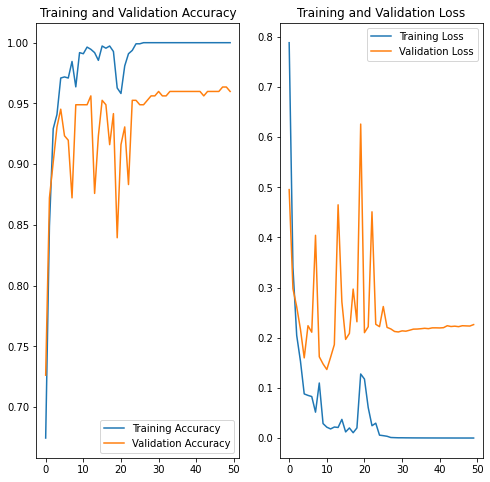

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [20]:
# 훈련

epochs=5

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
35/35 [==============================] - 80s 2s/step - loss: 0.6704 - accuracy: 0.6991 - val_loss: 0.4987 - val_accuracy: 0.7409
Epoch 2/5
35/35 [==============================] - 79s 2s/step - loss: 0.2757 - accuracy: 0.9073 - val_loss: 0.2865 - val_accuracy: 0.8796
Epoch 3/5
35/35 [==============================] - 79s 2s/step - loss: 0.1696 - accuracy: 0.9436 - val_loss: 0.2431 - val_accuracy: 0.9161
Epoch 4/5
35/35 [==============================] - 79s 2s/step - loss: 0.1406 - accuracy: 0.9473 - val_loss: 0.1988 - val_accuracy: 0.9380
Epoch 5/5
35/35 [==============================] - 80s 2s/step - loss: 0.1307 - accuracy: 0.9491 - val_loss: 0.1629 - val_accuracy: 0.9307


In [21]:
# 모델 저장
!pip install pyyaml h5py

In [22]:
import os

import tensorflow as tf
from tensorflow import keras

In [53]:
# 체크포인트 고유 이름으로 저장하기

# 파일 이름에 에포크 번호를 포함시킵니다(`str.format` 포맷)
checkpoint_path = "training_2/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# 다섯 번째 에포크마다 가중치를 저장하기 위한 콜백을 만듭니다
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    period=1) # 저장 주기 설정

# `checkpoint_path` 포맷을 사용하는 가중치를 저장합니다
model.save_weights(checkpoint_path.format(epoch=0))

# 새로운 콜백을 사용하여 모델을 훈련합니다
history = model.fit(train_ds,
          epochs=50, 
          callbacks=[cp_callback],
          validation_data=val_ds,
          verbose=1)

Epoch 1/50
35/35 [==============================] - ETA: 0s - loss: 0.6654 - accuracy: 0.6827
Epoch 00001: saving model to training_2/cp-0001.ckpt
35/35 [==============================] - 82s 2s/step - loss: 0.6654 - accuracy: 0.6827 - val_loss: 0.4782 - val_accuracy: 0.6861
Epoch 2/50
35/35 [==============================] - ETA: 0s - loss: 0.2429 - accuracy: 0.9164
Epoch 00002: saving model to training_2/cp-0002.ckpt
35/35 [==============================] - 85s 2s/step - loss: 0.2429 - accuracy: 0.9164 - val_loss: 0.2342 - val_accuracy: 0.9124
Epoch 3/50
35/35 [==============================] - ETA: 0s - loss: 0.1587 - accuracy: 0.9355
Epoch 00003: saving model to training_2/cp-0003.ckpt
35/35 [==============================] - 82s 2s/step - loss: 0.1587 - accuracy: 0.9355 - val_loss: 0.1805 - val_accuracy: 0.9526
Epoch 4/50
35/35 [==============================] - ETA: 0s - loss: 0.0973 - accuracy: 0.9618
Epoch 00004: saving model to training_2/cp-0004.ckpt
35/35 [==================

In [54]:
epochs=50

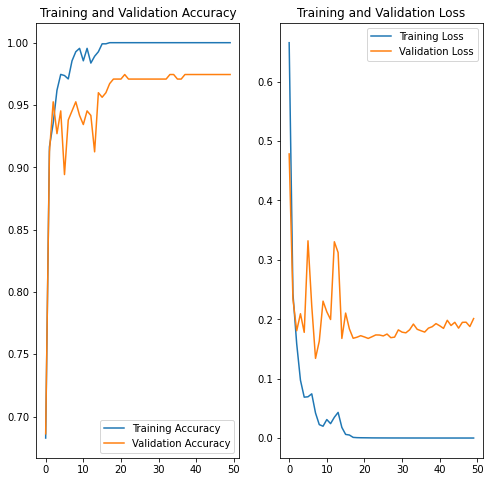

In [55]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [15]:
model.load_weights('cp-0003.ckpt.data-00000-of-00001')

OSError: ignored

In [17]:
a = os.listdir('/content')

['cp-0003.ckpt.data-00000-of-00001',
 'cp-0005.ckpt.index',
 'cp-0003.ckpt.index',
 'cp-0005.ckpt.data-00000-of-00001']

In [25]:
model.load_weights('cp-0005.ckpt')


In [26]:
model.save('600개씩모델.h5')

In [28]:
img_height = 256
img_width = 256

In [68]:
PET_path = '/content/drive/MyDrive/테스트파일/불가능/KakaoTalk_20211117_002238726_01.jpg'

이 사진은 99.99263286590576% 확률로 재활용가능데이터셋 입니다


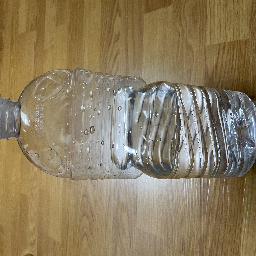

In [69]:
img = keras.preprocessing.image.load_img(
    PET_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "이 사진은 " + str(100 * np.max(score)) + "% 확률로 " +  class_names[np.argmax(score)] + ' 입니다')
img